<a href="https://colab.research.google.com/github/jpfernandes1/Distance-Speed-Regression/blob/main/Practicing_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lesson 22 - Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from yellowbrick.regressor import ResidualsPlot

In [ ]:
df = pd.read_csv("cars.csv")

In [ ]:
df.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


### Defining the variables

In [ ]:
# Defining x (distance; independent variable) and y (speed; dependent variable)

x = df.iloc[:,1].values # obs.: Dist UM = ft
y = df.iloc[:,0].values

x, y 

(array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
         24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
         32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
         48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85]),
 array([ 4,  4,  7,  7,  8,  9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13, 13,
        13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17, 18, 18, 18,
        18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25]))

In [ ]:
# calculating the correlation coefficient

correlation = np.corrcoef(x,y)
correlation

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [ ]:
# Turning the variable X into an array format:

x = x.reshape(-1,1)


In [ ]:
# Creating the model
model = LinearRegression()

# Executing the training (Fit does)

model.fit(x,y)

LinearRegression()

In [ ]:
# To know the intercept point of the line with vertical axis
model.intercept_

8.283905641787172

In [ ]:
# To know the line inclination
model.coef_

array([0.16556757])

## Building the Chart - DataViz

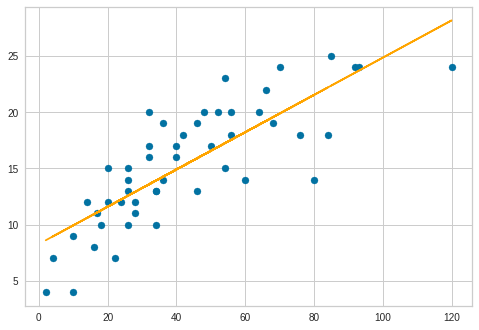

In [ ]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), color = 'orange')

### Once we have a trained model, we can predict a value to Y (speed) using the variable x (distance):
#### There are two ways to predict it:

In [ ]:
# 1: Using the mathematical formula:
# Y = Intercept point + line slope * X value

predict1 = model.intercept_ + model.coef_ * 22
predict1

In [ ]:
# 2: using sklearn
predict2 = model.predict([[22]])
predict2

array([11.92639228])

####Chart to visualize residues

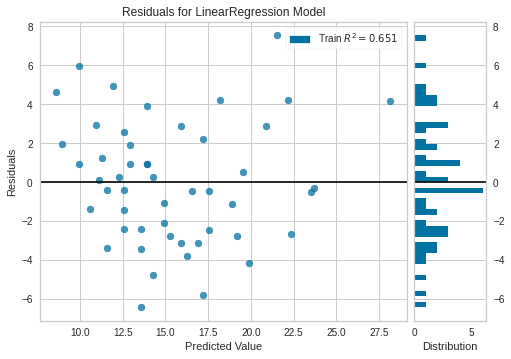

In [ ]:
res = ResidualsPlot(model)
res.fit(x,y)
res.poof()